# Downloading and saving CSV data files from the web

In [1]:
import urllib.request

url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'
csv_cont = urllib.request.urlopen(url)
csv_cont = csv_cont.read() # .decode('utf-8')

# saving the data to local drive
#with open('./datasets/wine_data.csv', 'wb') as out:
#    out.write(csv_cont)

# Reading in a dataset from a CSV file

In [2]:
import numpy as np

# reading in all data into a NumPy array
all_data = np.loadtxt( "./datasets/wine_data.csv", delimiter=",", dtype=np.float64 )

# load class labels from column 1
y_wine = all_data[:,0]

# conversion of the class labels to integer-type array
y_wine = y_wine.astype(np.int64, copy=False)

# load the 14 features
X_wine = all_data[:,1:]

# printing some general information about the data
print('\ntotal number of samples (rows):', X_wine.shape[0])
print('total number of features (columns):', X_wine.shape[1])

# printing the 1st wine sample
float_formatter = lambda x: '{:.2f}'.format(x)
np.set_printoptions(formatter={'float_kind':float_formatter})
print('\n1st sample (i.e., 1st row):\nClass label: {:d}\n{:}\n'
          .format(int(y_wine[0]), X_wine[0]))

# printing the rel.frequency of the class labels
print('Class label relative frequencies')
print('Class 1 samples: {:.2%}'.format(list(y_wine).count(1)/y_wine.shape[0]))
print('Class 2 samples: {:.2%}'.format(list(y_wine).count(2)/y_wine.shape[0]))
print('Class 3 samples: {:.2%}'.format(list(y_wine).count(3)/y_wine.shape[0]))


total number of samples (rows): 178
total number of features (columns): 13

1st sample (i.e., 1st row):
Class label: 1
[14.23 1.71 2.43 15.60 127.00 2.80 3.06 0.28 2.29 5.64 1.04 3.92 1065.00]

Class label relative frequencies
Class 1 samples: 33.15%
Class 2 samples: 39.89%
Class 3 samples: 26.97%


**Histograms** are a useful data to explore the distribution of each feature across the different classes. This could provide us with intuitive insights which features have a good and not-so-good inter-class separation. Below, we will plot a sample histogram for the "Alcohol content" feature for the three wine classes.

# Visualizating of a dataset with Histograms

In [3]:
first_fea = X_wine[:, 0]
print('minimum:', first_fea.min())
print('mean:', first_fea.mean())
print('Maximum:', first_fea.max())

minimum: 11.03
mean: 13.0006179775
Maximum: 14.83


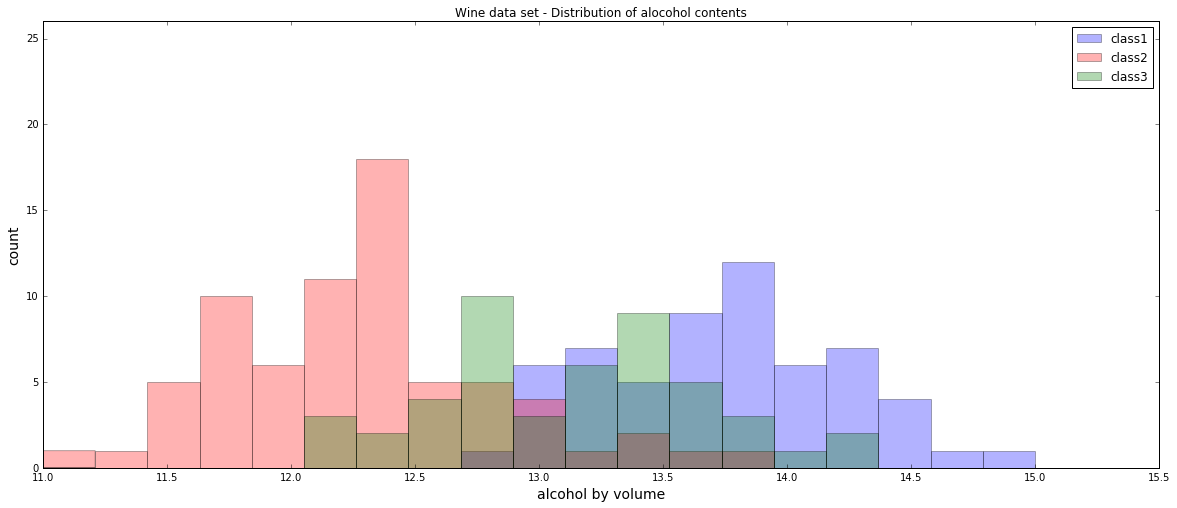

In [4]:
%matplotlib inline

from matplotlib import pyplot as plt
from math import floor, ceil # for rounding up and down

# bin width of the histogram in steps of 0.15
#bins = np.arange(floor(min(X_wine[:,0])), ceil(max(X_wine[:,0])), 0.15)
bins = np.linspace(floor(min(X_wine[:,0])), ceil(max(X_wine[:,0])), 20)
labels = np.unique(y_wine)

plt.figure(figsize=(20,8))

#  我们可以下面的循环语句来plot直方图，不用这三个基本上重复的语句
#plt.hist(first_fea[y_wine == 1], bins, alpha = 0.3, color='red')
#plt.hist(first_fea[y_wine == 2], bins, alpha = 0.3, color='blue')
#plt.hist(first_fea[y_wine == 3], bins, alpha = 0.3, color='green')


# the order of the colors for each histogram
colors = ('blue', 'red', 'green')
for label, color in zip( labels, colors ):
    plt.hist( first_fea[y_wine == label], bins=bins, alpha=0.3, color=color, label='class' + str(label) )

    
plt.title('Wine data set - Distribution of alocohol contents')
plt.xlabel('alcohol by volume', fontsize=14)
plt.ylabel('count', fontsize=14)
plt.legend(loc='upper right')


# 它返回的是数组的tuple，第一个数组是每个bin对应的值，第二个是bin的边界，因此第二个数组比第一个多1个元素
bin_value = np.histogram(first_fea, bins=bins)
# 找到最大的bin
max_bin = max(bin_value[0])
# 扩大y轴的范围
plt.ylim([0, max_bin*1.3])

plt.show()

# Visualizating of a dataset with Scatter plot

**Scatter plot** are useful for visualizing features in more than just one dimension, for example to get a feeling for the correlation between particular features.Below, we will create an example 2D-Scatter plot from the features "Alcohol content" and "Malic acid content".

In [5]:
second_fea = X_wine[:, 1]

print('minimum:', second_fea.min())
print('mean:', second_fea.mean())
print('Maximum:', second_fea.max())

minimum: 0.74
mean: 2.33634831461
Maximum: 5.8


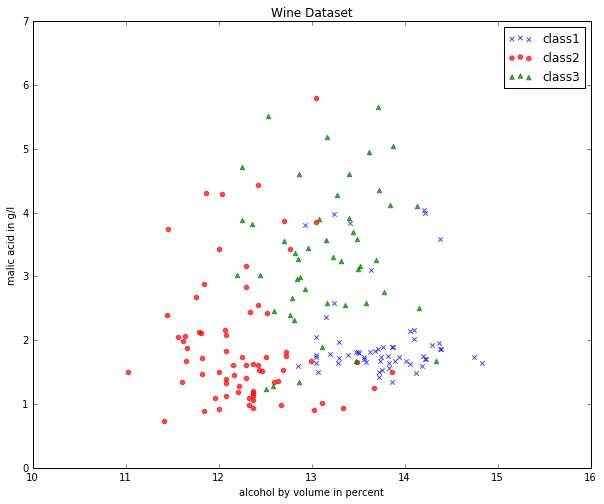

In [6]:
plt.figure(figsize=(10,8))

markers = ('x', 'o', '^')
# 和上图的原理类似，只不过把hist替换成了scatter
for label,marker,color in zip( labels, markers, colors ):
    plt.scatter( x=first_fea[y_wine == label], 
                 y=second_fea[y_wine == label], 
                 marker=marker, color=color,
                 alpha=0.7,
                 label='class' + str(label)
               ) 

    
plt.title('Wine Dataset')
plt.xlabel('alcohol by volume in percent')
plt.ylabel('malic acid in g/l')
plt.legend(loc='upper right')

plt.show()

If we want to pack 3 different features into **one scatter plot at once**, we can also do the same thing in 3D.

In [7]:
third_fea = X_wine[:, 2]

print('minimum:', third_fea.min())
print('mean:', third_fea.mean())
print('Maximum:', third_fea.max())

minimum: 1.36
mean: 2.36651685393
Maximum: 3.23


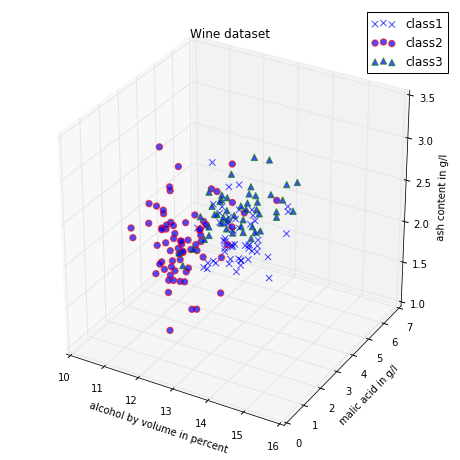

In [8]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
   
for label, marker, color in zip( labels, markers, colors ):
    ax.scatter( first_fea[y_wine == label], 
                second_fea[y_wine == label], 
                third_fea[y_wine == label],  
                marker=marker, 
                color=color, 
                s=40, 
                alpha=0.7,
                label='class' + str(label)
              )


ax.set_xlabel('alcohol by volume in percent')
ax.set_ylabel('malic acid in g/l')
ax.set_zlabel('ash content in g/l')
plt.title('Wine dataset')
plt.legend(loc='upper right')
     
plt.show()

# Splitting into training and test dataset

It is a typical procedure for machine learning and pattern classification tasks to split one dataset into two: a training dataset and a test dataset.

The training dataset is henceforth used to train our algorithms or classifier, and the test dataset is a way to validate the outcome quite objectively before we apply it to "new, real world data".

Here, we will split the dataset randomly so that 70% of the total dataset will become our training dataset, and 30% will become our test dataset, respectively.

In [9]:
from sklearn.cross_validation import train_test_split

# 加random_state的目的是reproducible
X_train, X_test, y_train, y_test = train_test_split(X_wine, y_wine, test_size=0.30, random_state=2016811)

# Standardization

Standardizing the features so that they are centered around 0 with a standard deviation of 1 is especially important if we are comparing measurements that have different units, e.g., in our "wine data" example, where the alcohol content is measured in volume percent, and the malic acid content in g/l.

In [10]:
from sklearn import preprocessing

# StandardScaler that implements the Transformer API to compute the mean and standard deviation on a training set 
# so as to be able to later reapply the same transformation on the testing set. 
std_scale = preprocessing.StandardScaler().fit(X_train)
X_train = std_scale.transform(X_train)
X_test = std_scale.transform(X_test)

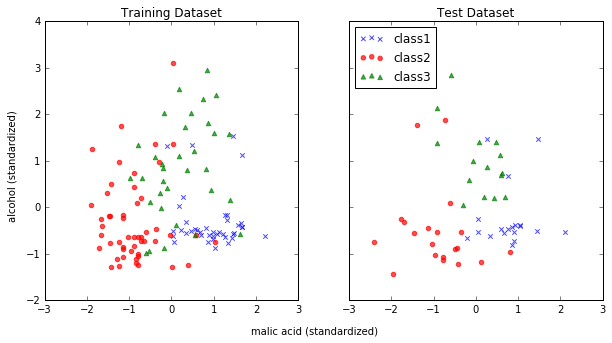

In [11]:
f, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(10,5))

# 和上面的图形一个原理，由于有重复的语句从而采用循环结构
for a, x_dat, y_lab in zip( ax, (X_train, X_test), (y_train, y_test) ):
    for label, marker, color in zip( labels, markers, colors ):
        a.scatter( x=x_dat[:,0][y_lab == label], 
                   y=x_dat[:,1][y_lab == label], 
                   marker=marker, 
                   color=color,   
                   alpha=0.7,   
                   label='class' + str(label)
                 )


a.legend(loc='upper left')
ax[0].set_title('Training Dataset')
ax[1].set_title('Test Dataset')
f.text(0.5, 0.04, 'malic acid (standardized)', ha='center', va='center')
f.text(0.08, 0.5, 'alcohol (standardized)', ha='center', va='center', rotation='vertical')

plt.show()

# Min-Max scaling (Normalization)

In this approach, the data is scaled to a fixed range - usually 0 to 1.
The cost of having this bounded range - in contrast to standardization - is that we will end up with small standard deviations, for example in the case where outliers are present.

In [12]:
minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1)).fit(X_train)
X_train_minmax = minmax_scale.transform(X_train)
X_test_minmax = minmax_scale.transform(X_test)

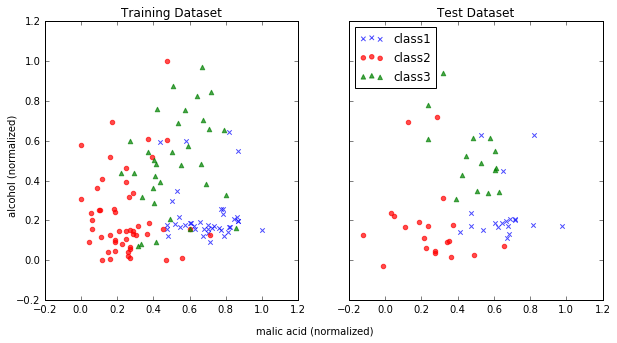

In [13]:
f, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(10,5))

# 和上面的图形一个原理，由于有重复的语句从而采用循环结构
for a, x_dat, y_lab in zip( ax, (X_train_minmax, X_test_minmax), (y_train, y_test) ):
    for label, marker, color in zip( labels, markers, colors ):
        a.scatter( x=x_dat[:,0][y_lab == label], 
                   y=x_dat[:,1][y_lab == label], 
                   marker=marker, 
                   color=color,   
                   alpha=0.7,   
                   label='class' + str(label)
                 )


a.legend(loc='upper left')
ax[0].set_title('Training Dataset')
ax[1].set_title('Test Dataset')
f.text(0.5, 0.04, 'malic acid (normalized)', ha='center', va='center')
f.text(0.08, 0.5, 'alcohol (normalized)', ha='center', va='center', rotation='vertical')

plt.show()

# Linear Transformation: Principal Component Analysis (PCA)

Here, our desired outcome of the principal component analysis is to project a feature space (our dataset consisting of n x d-dimensional samples) onto a smaller subspace that represents our data "well". A possible application would be a pattern classification task, where we want to reduce the computational costs and the error of parameter estimation by reducing the number of dimensions of our feature space by extracting a subspace that describes our data "best".

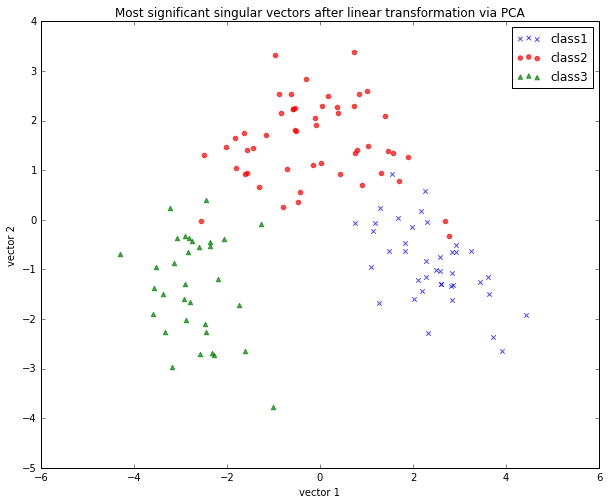

In [14]:
from sklearn.decomposition import PCA

pca_two_components = PCA(n_components = 2)
pca_train = pca_two_components.fit_transform(X_train)

plt.figure(figsize=(10,8))

for label,marker,color in zip( labels, markers, colors ):
    plt.scatter( x=pca_train[:,0][y_train == label],
                 y=pca_train[:,1][y_train == label], 
                 marker=marker, 
                 color=color,
                 alpha=0.7, 
                 label='class' + str(label)
               )


plt.xlabel('vector 1')
plt.ylabel('vector 2')
plt.legend()
plt.title('Most significant singular vectors after linear transformation via PCA')

plt.show()

为了可视化的目的，上面我只保留了2个主成分。但是，在实际应用中，我们应该根据实际的情况来判断应该保留多少个主成分。下面的代码把n_components设置为None，因此，我们保留了所有的主成分，然后在打印出来，来分析一下我们应该怎样去保留主成分。

In [18]:
sklearn_pca = PCA(n_components=None)
sklearn_transf = sklearn_pca.fit_transform(X_train)
print(sklearn_pca.explained_variance_ratio_)

[0.37 0.19 0.11 0.07 0.06 0.05 0.04 0.03 0.02 0.02 0.02 0.01 0.01]


# Linear Transformation: Linear Discriminant Analysis

Principal Component Analysis (PCA) applied to this data identifies the combination of attributes (principal components, or directions in the feature space) that account for the most variance in the data. 

Linear Discriminant Analysis (LDA) tries to identify attributes that account for the most variance between classes. In particular, LDA, in contrast to PCA, is a supervised method, using known class labels.

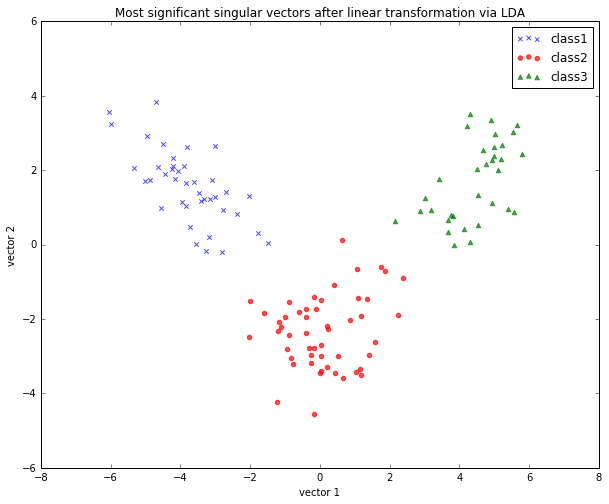

In [19]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda_two_components = LinearDiscriminantAnalysis(n_components = 2)
lda_train = lda_two_components.fit_transform(X_train, y_train)

plt.figure(figsize=(10,8))

for label,marker,color in zip( labels, markers, colors ):
    plt.scatter( x=lda_train[:,0][y_train == label],
                 y=lda_train[:,1][y_train == label], 
                 marker=marker, 
                 color=color,
                 alpha=0.7, 
                 label='class' + str(label)
               )


plt.xlabel('vector 1')
plt.ylabel('vector 2')
plt.legend()
plt.title('Most significant singular vectors after linear transformation via LDA')

plt.show()

Linear Discriminant Analysis 不仅仅可以用于dimensionality reduction，它还可以作为分类器，详情请参考[Logistic Regression、Linear Discriminant Analysis、Shrinkage Methods（Ridge Regression and Lasso）](http://blog.csdn.net/xlinsist/article/details/52211334#t2)